<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Concentrix_ML_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

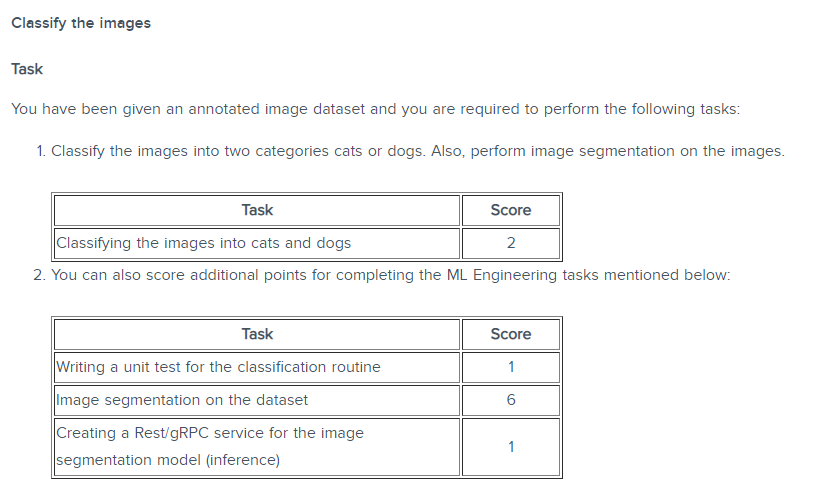

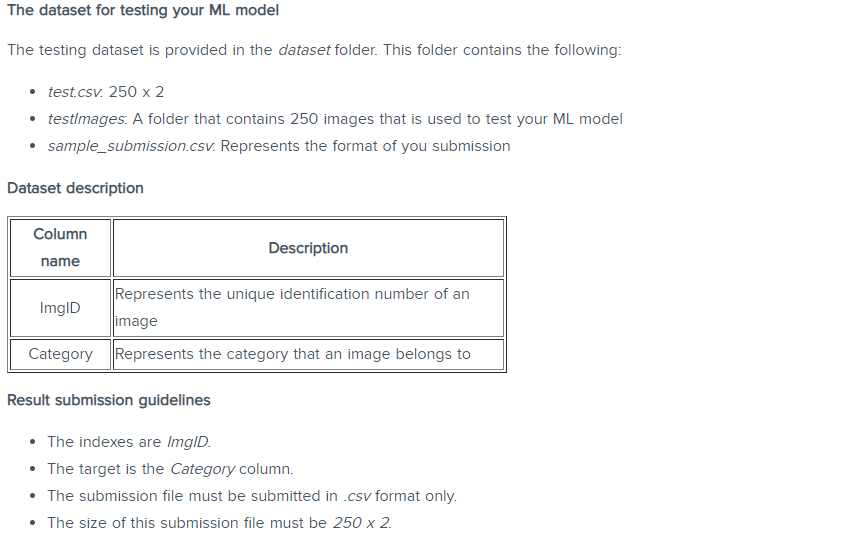

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
from google.colab import files
files.upload()

Saving images.tar.gz to images.tar.gz


In [2]:
import os
import shutil
shutil.copy ("/content/images.tar.gz","/content/drive/MyDrive/Machine_Hack/Concentrix")

'/content/drive/MyDrive/Machine_Hack/Concentrix/images.tar.gz'

In [3]:
%%capture
!pip install ipyplot

In [4]:
!tar -xzvf "/content/images.tar.gz" -C "/content/drive/MyDrive/Machine_Hack/Concentrix" #[run this cell to extract tar.gz files]

Streaming output truncated to the last 5000 lines.
images/american_bulldog_194.jpg
images/Birman_175.jpg
images/american_bulldog_178.jpg
images/staffordshire_bull_terrier_93.jpg
images/Egyptian_Mau_58.jpg
images/havanese_44.jpg
images/english_cocker_spaniel_97.jpg
images/Ragdoll_111.jpg
images/american_pit_bull_terrier_159.jpg
images/english_setter_134.jpg
images/english_setter_87.jpg
images/wheaten_terrier_198.jpg
images/pug_180.jpg
images/boxer_172.jpg
images/Sphynx_197.jpg
images/german_shorthaired_2.jpg
images/British_Shorthair_9.jpg
images/pug_89.jpg
images/japanese_chin_39.jpg
images/Ragdoll_20.jpg
images/american_bulldog_111.jpg
images/yorkshire_terrier_112.jpg
images/Persian_88.jpg
images/pug_9.jpg
images/Birman_40.jpg
images/British_Shorthair_272.jpg
images/havanese_7.jpg
images/pomeranian_154.jpg
images/beagle_49.jpg
images/British_Shorthair_94.jpg
images/Persian_90.jpg
images/staffordshire_bull_terrier_30.jpg
images/samoyed_113.jpg
images/english_cocker_spaniel_46.jpg
images

In [ ]:
!unzip "/content/1b394254f35711eb.zip" -d "/content/drive/MyDrive/Machine_Hack/Concentrix"

Archive:  /content/1b394254f35711eb.zip
   creating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/
   creating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/21.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/146.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/23.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/227.jpeg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/22.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/24.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/3.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/7.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/1.jpg  
  inflating: /conte

##list.txt	

* Combined list of all images in the dataset

* Each entry in the file is of following nature:
		Image CLASS-ID SPECIES BREED ID
		ID: 1:37 Class ids
		SPECIES: 1:Cat 2:Dog
		BREED ID: 1-25:Cat 1:12:Dog
* All images with 1st letter as captial are cat images while
* images with small first letter are dog images.

## Import require Libraries for Data Processing

In [5]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score, accuracy_score
import cv2
import ipyplot
from PIL  import Image
import seaborn as sns
import matplotlib.pyplot as plt


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        


In [10]:
images = []
labels = []
root = "/content/drive/MyDrive/Machine_Hack/Concentrix/images/"
for img in os.listdir(root):
  if img[0].isupper() == True:
    print(img)
    labels.append('cat')
    images.append(os.path.join(root,img))
  else:
    labels.append('dog')
    images.append(os.path.join(root,img))
  

Egyptian_Mau_62.jpg
Ragdoll_183.jpg
British_Shorthair_64.jpg
Abyssinian_136.jpg
Siamese_201.jpg
Abyssinian_85.jpg
Siamese_63.jpg
Maine_Coon_126.jpg
Birman_15.jpg
Abyssinian_37.jpg
Bombay_91.jpg
Egyptian_Mau_6.jpg
Maine_Coon_173.jpg
British_Shorthair_129.jpg
Ragdoll_155.jpg
Sphynx_1.jpg
Persian_4.jpg
Abyssinian_219.jpg
Siamese_25.jpg
Egyptian_Mau_195.jpg
Birman_164.jpg
Abyssinian_6.jpg
Bengal_55.jpg
Egyptian_Mau_119.jpg
Sphynx_211.jpg
Siamese_152.jpg
Sphynx_164.jpg
Birman_91.jpg
British_Shorthair_128.jpg
Bengal_175.jpg
Russian_Blue_24.jpg
Birman_56.jpg
Russian_Blue_204.jpg
Abyssinian_10.jpg
Egyptian_Mau_143.jpg
Bombay_16.jpg
Bombay_150.jpg
Ragdoll_224.jpg
Birman_59.jpg
Birman_153.jpg
Siamese_39.jpg
Birman_142.jpg
Siamese_206.jpg
Maine_Coon_264.jpg
Maine_Coon_262.jpg
Ragdoll_54.jpg
Birman_76.jpg
Siamese_224.jpg
Abyssinian_140.jpg
Abyssinian_82.jpg
Maine_Coon_30.jpg
Abyssinian_174.jpg
Persian_99.jpg
Abyssinian_26.jpg
Ragdoll_100.jpg
Abyssinian_228.jpg
Birman_71.jpg
Siamese_238.jpg
British

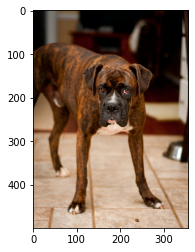

In [7]:
img_name = os.path.join(root,'boxer_16.jpg')
imgs = Image.open(img_name)
plt.imshow(imgs)

In [11]:
len(images),len(labels)

(7393, 7393)

In [12]:
train = pd.DataFrame({'ImgID':images,'Label':labels})

In [13]:
train.head()

,ImgID,Label
0,/content/drive/MyDrive/Machine_Hack/Concentrix...,dog
1,/content/drive/MyDrive/Machine_Hack/Concentrix...,dog
2,/content/drive/MyDrive/Machine_Hack/Concentrix...,dog
3,/content/drive/MyDrive/Machine_Hack/Concentrix...,dog
4,/content/drive/MyDrive/Machine_Hack/Concentrix...,dog


## Shuffle dataframe

In [14]:
train = train.sample(frac = 1)

In [15]:
train.head()

,ImgID,Label
7343,/content/drive/MyDrive/Machine_Hack/Concentrix...,cat
5037,/content/drive/MyDrive/Machine_Hack/Concentrix...,cat
6902,/content/drive/MyDrive/Machine_Hack/Concentrix...,dog
1660,/content/drive/MyDrive/Machine_Hack/Concentrix...,dog
6081,/content/drive/MyDrive/Machine_Hack/Concentrix...,cat


In [16]:
train.to_csv("/content/drive/MyDrive/Machine_Hack/Concentrix/dataset/train.csv",index=False)

In [17]:
train = pd.read_csv("/content/drive/MyDrive/Machine_Hack/Concentrix/dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Machine_Hack/Concentrix/dataset/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/Machine_Hack/Concentrix/dataset/sample_submission.csv")

In [18]:
train.head()

,ImgID,Label
0,/content/drive/MyDrive/Machine_Hack/Concentrix...,cat
1,/content/drive/MyDrive/Machine_Hack/Concentrix...,cat
2,/content/drive/MyDrive/Machine_Hack/Concentrix...,dog
3,/content/drive/MyDrive/Machine_Hack/Concentrix...,dog
4,/content/drive/MyDrive/Machine_Hack/Concentrix...,cat


In [19]:
test.head()

,ImgID
0,1
1,2
2,3
3,4
4,5


In [20]:
test['ImgID'] = test['ImgID'].astype('str') + ".jpg"
test.head()

,ImgID
0,1.jpg
1,2.jpg
2,3.jpg
3,4.jpg
4,5.jpg


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/10.jpg")

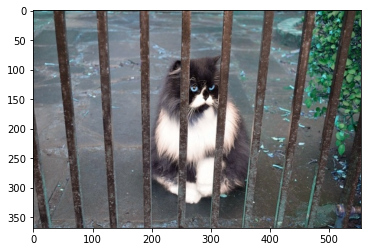

In [ ]:
plt.imshow(img)

## Applying Transfer Learning using Keras

In [21]:
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed, Activation, MaxPool2D
from tensorflow.keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.regularizers import *
#
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')
#
import os
import shutil
import cv2
import glob
from tqdm.notebook import tqdm
from tqdm import tqdm
from PIL import Image
#
import gc
#
import warnings
warnings.filterwarnings('ignore')


In [22]:
train = train.drop_duplicates('ImgID')

In [23]:
train.shape

(7393, 2)

In [24]:
import random
random.randint(1,100)
## 
train_formated = train.copy()
##
image_samples = train_formated['ImgID'].values.tolist()
image_labels = train_formated['Label'].values.tolist()
#
image_array = []
image_label_array = []
for i in range(16):
  index = random.randint(1,100)
  img = Image.open(image_samples[index])
  image_array.append(img)
  image_label_array.append(image_labels[index])


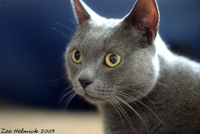
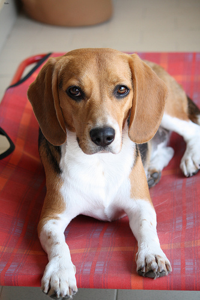
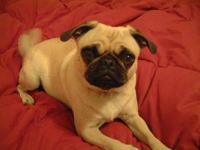
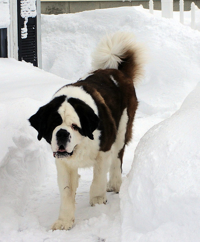
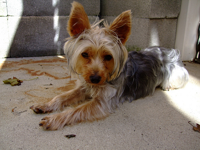
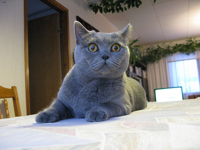
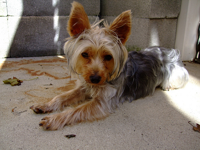
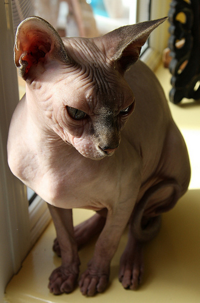
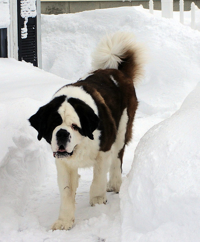
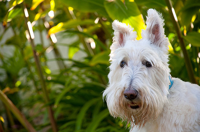
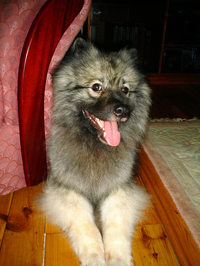
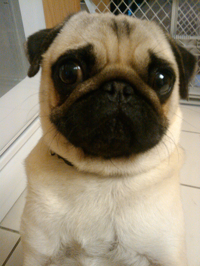
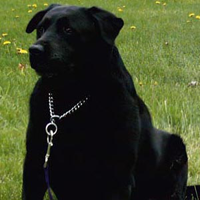
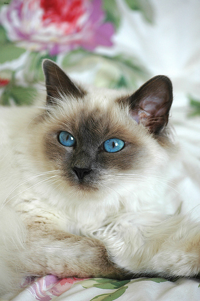
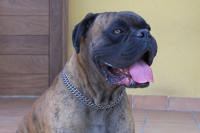
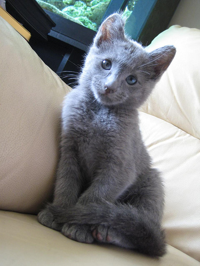


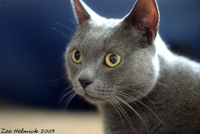
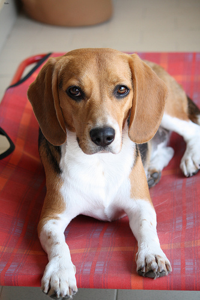
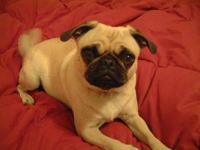
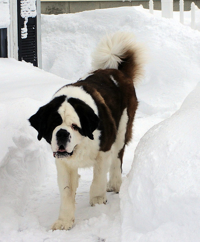
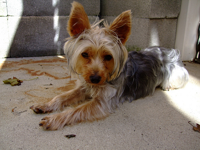
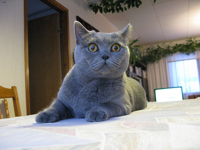
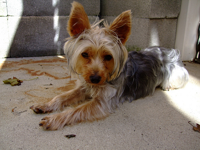
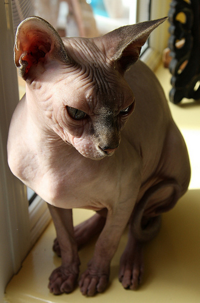
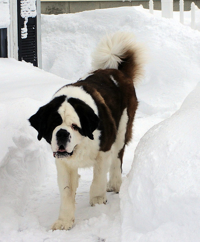
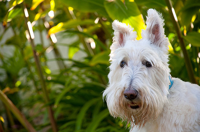
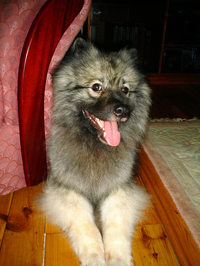
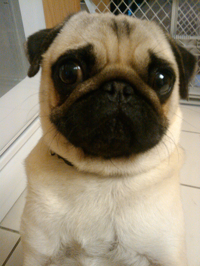
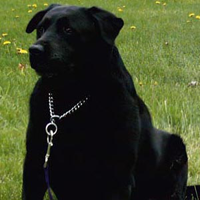
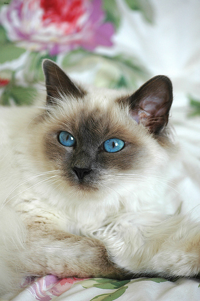
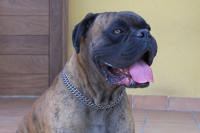
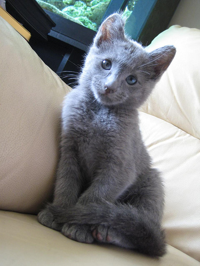

In [25]:
ipyplot.plot_images(image_array,image_label_array,img_width=200)